In [35]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from genetic import GeneticAlgorithm

In [79]:
data = {
    "Maxes": [],
    "Mins": [],
    "Avgs": [],
    "Best Solution": [],
    "Parameters": []
}
def add_to_data(j):
    data["Maxes"].append(j["maxes"])
    data["Mins"].append(j["mins"])
    data["Avgs"].append(j["averages"])
    data["Best Solution"].append(j["abs_min"][0])
    data["Parameters"].append(j["runtype"])
    
def plotrun(mins: list, maxes: list, avgs: list, title: str):
    # Generate the x-axis values using the length of the data
    generations = range(len(mins))
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot mins, maxes, and avgs
    plt.plot(generations, mins, label='Min Values', marker='o')
    plt.plot(generations, maxes, label='Max Values', marker='o')
    plt.plot(generations, avgs, label='Avg Values', marker='o')
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Generations')
    plt.ylabel('Values')
    
    # Add legend to differentiate the lines
    plt.legend()

    # Display the plot
    plt.grid(True)
    plt.show()

def get_parameter_info(df, parameters: str):
    info = {}
    best_solutions = df[df["Parameters"] == parameters]["Best Solution"]
    info["mean"] = best_solutions.mean()
    info["std"] = best_solutions.std()
    info["min"] = best_solutions.min()
    info["max"] = best_solutions.max()
    return info

In [80]:
RUN_TYPE = "ROULETTESWAP"
# Run Roulette/Swap Combo 5 times.
for i in range(5):
    with open(f"runs/{RUN_TYPE}_{i}.json", "r") as json_file:
        j = json.load(json_file)
        j["runtype"] = RUN_TYPE
        add_to_data(j)

RUN_TYPE = "ROULETTESCRAMBLE"
# Run Roulette/Scramble Combo 5 times.
for i in range(5):
    with open(f"runs/{RUN_TYPE}_{i}.json", "r") as json_file:
        j = json.load(json_file)
        j["runtype"] = RUN_TYPE
        add_to_data(j)

RUN_TYPE = "TOURNAMENTSWAP"
# Run Tournament/Swap Combo 5 times
for i in range(5):
    with open(f"runs/{RUN_TYPE}_{i}.json", "r") as json_file:
        j = json.load(json_file)
        j["runtype"] = RUN_TYPE
        add_to_data(j)

RUN_TYPE = "TOURNAMENTSCRAMBLE"
# Run Tournament/Scramble Combo 5 times
for i in range(5):
    with open(f"runs/{RUN_TYPE}_{i}.json", "r") as json_file:
        j = json.load(json_file)
        j["runtype"] = RUN_TYPE
        add_to_data(j)

In [81]:
df = pd.DataFrame(data)
IDS = []
final_data = {
    "MAX": [],
    "MIN": [],
    "STD": [],
    "MEAN": []
}

for id in ["ROULETTESWAP", "ROULETTESCRAMBLE", "TOURNAMENTSWAP", "TOURNAMENTSCRAMBLE"]:
    info = get_parameter_info(df, id)
    IDS.append(id)
    final_data["MAX"].append(info["max"])
    final_data["MIN"].append(info["min"])
    final_data["STD"].append(info["std"])
    final_data["MEAN"].append(info["mean"])

final_df = pd.DataFrame(final_data, index=IDS)
final_df

,MAX,MIN,STD,MEAN
ROULETTESWAP,2802.291709,2619.572437,71.147068,2708.052756
ROULETTESCRAMBLE,2866.870692,2772.428371,42.303041,2809.620658
TOURNAMENTSWAP,1473.079601,1200.869585,99.951768,1314.419490
TOURNAMENTSCRAMBLE,1346.253429,1221.460212,44.676177,1288.566911


In [82]:
rswap = df[df["Parameters"] == "ROULETTESWAP"].iloc[0]["Mins"]
rscramble = df[df["Parameters"] == "ROULETTESCRAMBLE"].iloc[0]["Mins"]
tswap = df[df["Parameters"] == "TOURNAMENTSWAP"].iloc[0]["Mins"]
tscramble = df[df["Parameters"] == "TOURNAMENTSCRAMBLE"].iloc[0]["Mins"]

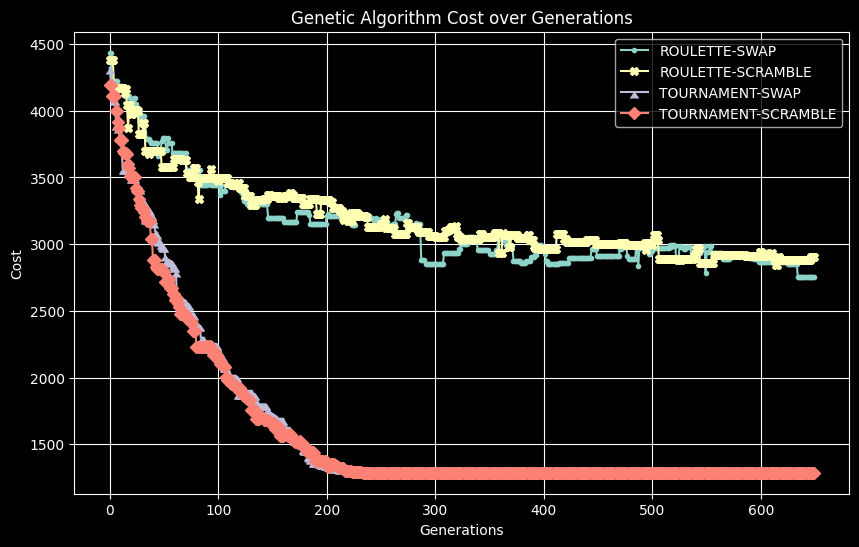

In [83]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 6))
#history = history[1]
ax.plot(range(650), rswap, label='ROULETTE-SWAP', marker='.')
ax.plot(range(650), rscramble, label='ROULETTE-SCRAMBLE', marker='X')
ax.plot(range(650), tswap, label='TOURNAMENT-SWAP', marker=6)
ax.plot(range(650), tscramble, label='TOURNAMENT-SCRAMBLE', marker="D")
ax.set_xlabel('Generations')
ax.set_ylabel('Cost')
ax.set_title('Genetic Algorithm Cost over Generations')
ax.legend()
ax.grid(True)